### We have the following microscopic model with Mean-firing rate for each population

$$\lambda_E(t)=\mu_E+\sum_{i_E}\overbrace{n_{EE}}^{\approx g_EN_E^2?}\phi\left(t-t_{i_E}^E\right)-\sum_{i_I}\overbrace{n_{IE}}^{\approx g_IN_IN_E?}\phi\left(t-t_{i_I}^I\right)$$
$$\lambda_I(t)=\mu_I+\sum_{i_E}\underbrace{n_{EI}}_{\approx g_EN_EN_I?}\phi\left(t-t_{i_E}^E\right)-\sum_{i_I}\underbrace{n_{II}}_{\approx g_IN_I^2?}\phi\left(t-t_{i_I}^I\right)$$

#### We consider Kronecker's delta kernel, therefore, the associated differential equations are:

$$\dot{\lambda}_E(t)=\dfrac{\mu_E-\lambda_E}{\tau}+\sum_{i_E}n_{EE}\delta\left(t-t_{i_E}^E\right)-\sum_{i_I}n_{IE}\delta\left(t-t_{i_I}^I\right)$$
$$\dot{\lambda}_I(t)=\dfrac{\mu_I-\lambda_I}{\tau}+\sum_{i_E}n_{EI}\delta\left(t-t_{i_E}^E\right)-\sum_{i_I}n_{II}\delta\left(t-t_{i_I}^I\right)$$

The simulations gotta satisfy $g_I \sim 5-6 g_E$, $N_I\sim \frac{1}{5}N$ and $N_E\sim \frac{4}{5}N$

Our charasteristic time is $\tau=1$ 

Nuestras "influencias" entre las neuronas las podemos modelar como (podemos quitar K y $\mu=\mu/K$)

$$n_{E\to E}=g_{E\to E}\cdot K\cdot \dfrac{N_E}{N} \cdot \dfrac{N_E}{N}$$
$$n_{E\to I}=g_{E\to E}\cdot K\cdot \dfrac{N_I}{N} \cdot \dfrac{N_E}{N}$$
$$n_{I\to E}=g_{E\to E}\cdot K\cdot \dfrac{N_I}{N} \cdot \dfrac{N_I}{N}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def model(n_max, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt):
    """
    Solve the equations of the mena field model for a given number of iterations n_max
    
    Inputs:
    n_max: number of iterations
    mu_E: Poisson rate of excitatory neurons
    mu_I: Poisson rate of inhibitory neurons
    tau: characteristic time of the system
    n_EE: influence of excitatory neurons on excitatory neurons
    n_IE: influence of excitatory neurons on inhibitory neurons
    n_EI: influence of inhibitory neurons on excitatory neurons
    n_II: influence of inhibitory neurons on inhibitory neurons
    dt: time step

    Outputs:
    t_events_E: times of events of excitatory neurons
    t_events_I: times of events of inhibitory neurons
    rates_E: rates of excitatory neurons
    rates_I: rates of inhibitory neurons
    """
    n_E = n_I = n = 0
    t_events_E = [0]
    t_events_I = [0]
    rates_E = [mu_E]
    rates_I = [mu_I]
    time = [0]
    while n <= n_max:
        # Excitation neurons
        l_Enew = rates_E[-1]  + dt * (mu_E- rates_E[-1])/tau
        if np.random.uniform() < rates_E[-1]*dt:
            l_Enew += n_EE
            t_events_E.append(t_events_E[-1]+dt*np.random.uniform())
            n_E += 1
        if np.random.uniform() < rates_I[-1]*dt:
            l_Enew -= n_IE
            t_events_E.append(t_events_E[-1]+dt*np.random.uniform())
            n_E += 1

        # Inhibition neurons
        l_Inew = rates_I[-1] + dt * (mu_I- rates_I[-1])/tau
        if np.random.uniform() < rates_E[-1]*dt:
            l_Inew += n_EI
            t_events_I.append(t_events_I[-1]+dt*np.random.uniform())
            n_I += 1
        if np.random.uniform() < rates_I[-1]*dt:
            l_Inew -= n_II
            t_events_I.append(t_events_I[-1]+dt*np.random.uniform())
            n_I += 1
        rates_E.append(l_Enew)
        rates_I.append(l_Inew)
        time.append(time[-1]+dt)

        n = n_E + n_I
    return time, t_events_E, t_events_I, rates_E, rates_I

In [7]:
from funciones import *

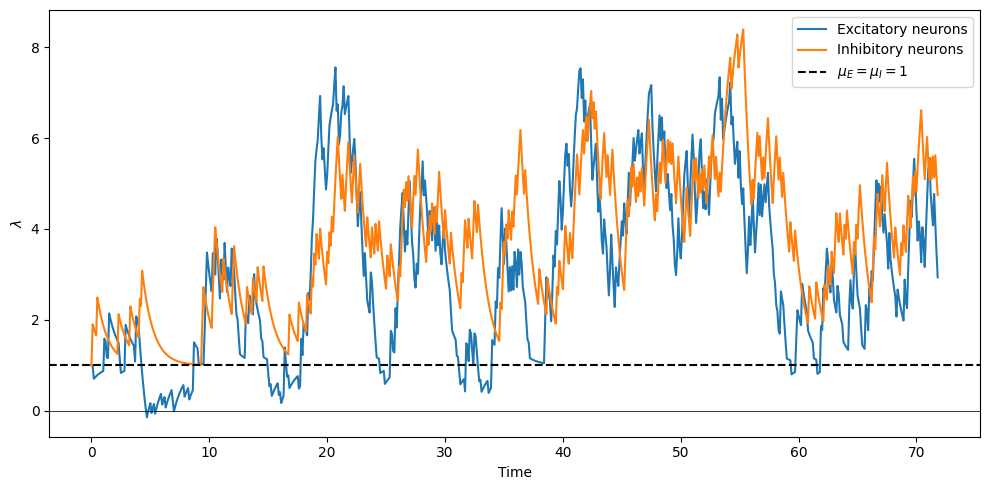

In [8]:
nmax = 1000
mu_E = 1
mu_I = 1
tau = 1
# These parameters are similar to the ones used in Growing Critical: Self-Organized Criticality in a Developing Neural System Felipe Yaroslav Kalle Kossio
"""n_EE = 1.5*(4/5)**2
n_IE = 7.5*4/(5**2)
n_EI = 1.5*4/(5**2)
n_II = 7.5*1/(5**2)"""
n_EE = 1.0
n_IE = 0.3
n_EI = 0.9
n_II = 0

dt = 0.1

time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)

total_rate= np.array(rates_E) - np.array(rates_I)

fig = plt.figure(figsize=(10, 5))
x1 = np.arange(0,len(rates_E),1)
x2 = np.arange(0,len(rates_I),1)
plt.plot(time, rates_E, label='Excitatory neurons')
plt.plot(time, rates_I, label='Inhibitory neurons')
#plt.plot(x1, total_rate, label='Total rate')
plt.xlabel('Time')
plt.axhline(1, label = '$\mu_E=\mu_I=1$', color = 'black', linestyle = '--')
plt.axhline(0, color = 'black',lw = 0.55)
plt.ylabel('$\lambda$')
plt.legend()
fig.tight_layout()

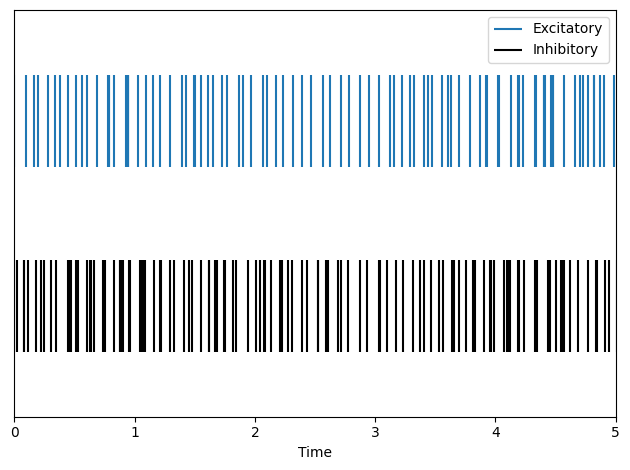

In [9]:
plt.eventplot(t_E, label = 'Excitatory')
plt.eventplot(t_I, label = 'Inhibitory', colors= 'black', lineoffsets= -1)
plt.xlim(0,5)
plt.xlabel('Time')
plt.yticks([])
plt.legend()
plt.tight_layout()

### Pruebas

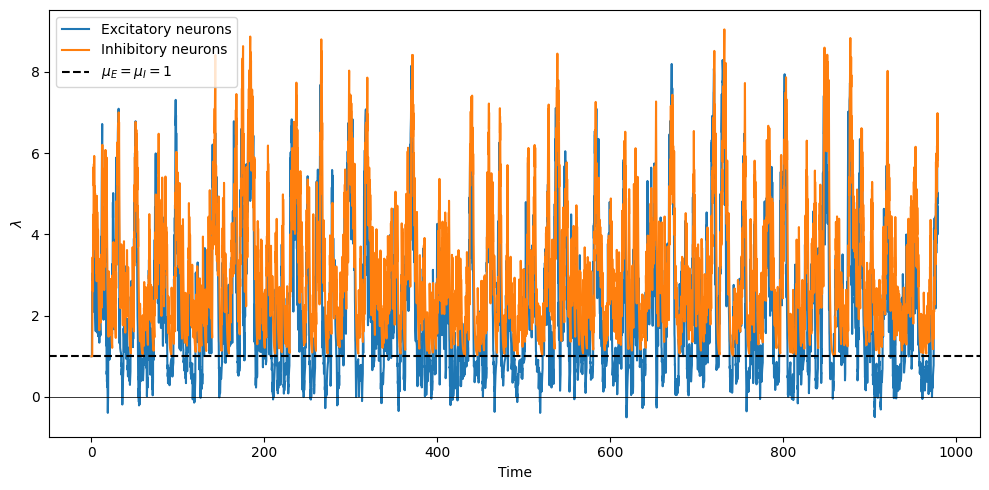

In [10]:
nmax = 10000
N = 1000 # number of neurons
N_E = 800 # number of excitatory neurons
N_I = 200 # number of inhibitory neurons
g_E= 1.5/N # connection strength of excitatory neurons
g_I= 7.5/N # connection strength of inhibitory neurons
k = 1
mu_E = 1
mu_I = 1
tau = 1

# These parameters are similar to the ones used in Growing Critical: Self-Organized Criticality in a Developing Neural System Felipe Yaroslav Kalle Kossio
"""n_EE = 1.5*(4/5)**2
n_IE = 7.5*4/(5**2)
n_EI = 1.5*4/(5**2)
n_II = 7.5*1/(5**2)"""

n_EE = N*g_E*(N_E/N)*(N_E/N)*k
n_IE = N*g_I*(N_I/N)*(N_I/N)*k
n_EI = N*g_E*(N_E/N)*(N_E/N)*k
n_II = 0

dt = 0.1

time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)

total_rate= np.array(rates_E) - np.array(rates_I)

fig = plt.figure(figsize=(10, 5))
x1 = np.arange(0,len(rates_E),1)
x2 = np.arange(0,len(rates_I),1)
plt.plot(time, rates_E, label='Excitatory neurons')
plt.plot(time, rates_I, label='Inhibitory neurons')
#plt.plot(x1, total_rate, label='Total rate')
plt.xlabel('Time')
plt.axhline(1, label = '$\mu_E=\mu_I=1$', color = 'black', linestyle = '--')
plt.axhline(0, color = 'black',lw = 0.55)
plt.ylabel('$\lambda$')
plt.legend()
fig.tight_layout()


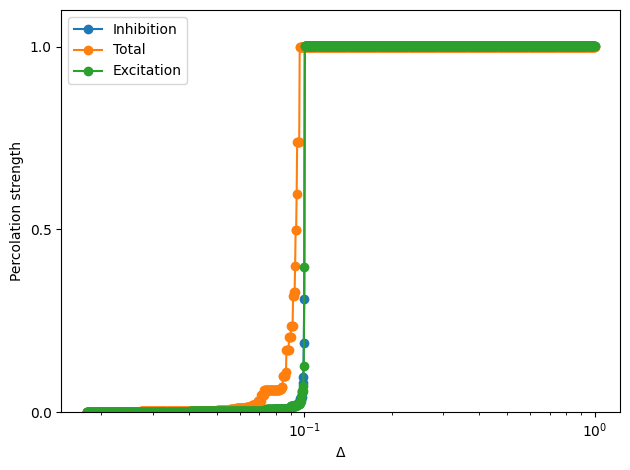

In [11]:
deltas = np.logspace(-1.75, 0, base= 10, num = 1000)
percolation_strength_exc = calculate_percolation_strength(np.diff(t_E), deltas)
percolation_strength_inh = calculate_percolation_strength(np.diff(t_I), deltas)
t = np.concatenate((t_E, t_I))
t = np.sort(t)
percolation_strength_tot = calculate_percolation_strength(np.diff(t), deltas)
plt.plot(deltas, percolation_strength_inh, marker = 'o', label = 'Inhibition')
plt.plot(deltas, percolation_strength_tot, marker = 'o', label = 'Total')
plt.plot(deltas, percolation_strength_exc, marker = 'o', label = 'Excitation')
plt.xscale('log')
plt.ylim(0, 1.1)
plt.yticks([0, 0.5, 1])
plt.xlabel('$\Delta$')
plt.ylabel('Percolation strength')
plt.legend()

plt.tight_layout()

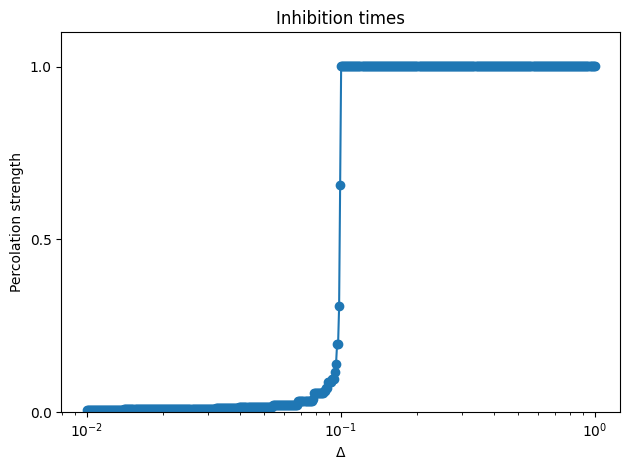

In [36]:
deltas = np.logspace(-2, 0, base= 10, num = 500)
percolation_strength = calculate_percolation_strength(np.diff(t_I), deltas)
plt.plot(deltas, percolation_strength, marker = 'o')
plt.xscale('log')
plt.ylim(0, 1.1)
plt.yticks([0, 0.5, 1])
plt.xlabel('$\Delta$')
plt.ylabel('Percolation strength')
plt.title('Inhibition times')
plt.tight_layout()

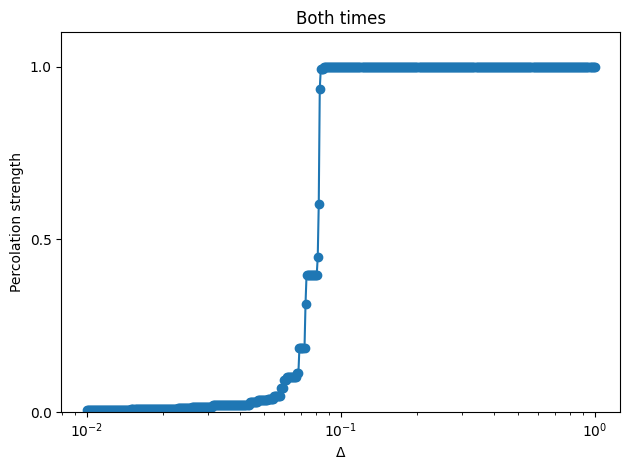

In [40]:
deltas = np.logspace(-2, 0, base= 10, num = 500)
t = np.concatenate((t_E, t_I))
t = np.sort(t)
percolation_strength = calculate_percolation_strength(np.diff(t), deltas)
plt.plot(deltas, percolation_strength, marker = 'o')
plt.xscale('log')
plt.ylim(0, 1.1)
plt.yticks([0, 0.5, 1])
plt.xlabel('$\Delta$')
plt.ylabel('Percolation strength')
plt.title('Both times')
plt.tight_layout()


In [34]:
delta = 10**-1

clusters = identify_clusters(t_E, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

plt.hist(cluster_sizes, bins = np.arange(0, 100, 1), density = True, histtype = 'step', label = 'Cluster sizes')

[0, 0.07790673647123879, 0.14834587771497446, 0.23973198495966724, 0.25520656554713284, 0.34770207516962953, 0.3868113908695552, 0.4361586179670152, 0.5175868307383374, 0.5273568317497509, 0.537999739713938, 0.5858626646330155, 0.6376901956508041, 0.6634838040796777, 0.7131221415561987, 0.7946759481222557, 0.8583593053363031, 0.9127981416589072, 0.9355893244978704, 0.9366671691570025, 0.9863560157970166, 1.0083391943029378, 1.0599337290506559, 1.0870492895022745, 1.1524063021989797, 1.1957972534022079, 1.264721321361585, 1.3604145925784996, 1.444693011846594, 1.4895164903037788, 1.523499680406088, 1.5775664984106552, 1.6012133661454915, 1.6954505933977235, 1.7633917033464424, 1.8321047576572136, 1.920600006996194, 1.9810182996892711, 2.0599462767968775, 2.1087549333921656, 2.121687337907398, 2.187581269497834, 2.1912384488243877, 2.233765156500228, 2.238957212837644, 2.29259928792459, 2.3111270599325886, 2.371182236068905, 2.451070486869549, 2.4874382408295013, 2.5598250159528257, 2.56